# Replication with Julia from Jupyter
### Matt Ingram
### University at Albany, SUNY
# Replication 1: Lacina (2006)
### __Computing Tools__: Julia and markdown in JupyterHub
### __Subject fields__: political science, international relations, civil war, political violence, conflict studies, peace science
### __Methods topics__: data management, descriptive statistics, histograms, OLS

# Introduction

This notebook documents a replication of Lacina (2006) in Julia from within the Jypyter platform. 

Julia can run natively in Jupyter using the IJulia kernel. That is, in contrast to using Stata, where a notebook opens with Python running natively and Stata must be called within each cell that uses Stata (by using cell magic, %%stata), users can run a notebook like this one with Julia running natively. Julia does not need to be called within each cell.

For more information on IJulia kernel, see: https://github.com/JuliaLang/IJulia.jl

To use Julia, Julia would ideally be installed on the server site-wide. However, we have had some difficulties with that, so in the interim Julia should be installed locally. That is, the IJulia package needs to be added.

To do this, open a terminal window from Jupyter (use pull-down menu at top-right of home Jupyter page), and call Julia by typing __julia__ at the __$__ prompt:

$julia

Then, within Julia, type the following at the __julia>__ prompt:

julia> using Pkg  
julia> Pkg.add("IJulia")

I am using JupyterHub and JupyterLab. JupyterHub is a server-based version of Jupyter that allows central installation of software and multiple users. In academic settings, the advantages are:
- shared resources to avoid duplication and enhance collaboration
- secure sign-on with instiutional IDs and passwords
- remote computing
- extensions to use JupyterHub as a learning management system, including assigmment management

JupyterLab is an interface that mimics features of an integrated development environment (IDE), allowing multiple notebooks to be opened at once, side by side, while at the same time being able to view directory, pull-down menus, etc.

For more information on Jupyter, see: http://jupyter.org/

For more information on JupyterHub, see: https://github.com/jupyterhub/jupyterhub

For more information on JupyterLab, see: https://github.com/jupyterlab/jupyterlab

# Set Environment

## Install packages

### Commands
- _Pkg.add_ installs the package

- _using_ opens an installed package

Start by opening the _Pkg_ package which is our package manager that allows us to install other packages. 

In [30]:
using Pkg

In [31]:
Pkg.add("GLM")
#Pkg.add("GLMNet")
ENV["PYTHON"]="/opt/apps/miniconda3/bin/python" # tells IJulia where python3 is located; this if for package PyPlot
Pkg.build("PyCall") # rebuilds call to python; this if for package PyPlot
Pkg.add("PyPlot")
Pkg.add("CSV")
Pkg.add("HTTP")
Pkg.add("DelimitedFiles")
# JuliaStats packages, from http://juliastats.github.io/
Pkg.add("StatsModels")
#Pkg.add("MultivariateStats")
#Pkg.add("DataFrames")
Pkg.add("StatsKit") # loads several packages associated with JuliaStats, including DataFrames and MultivariateStats

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
  Building Conda ─→ `~/.julia/packages/Conda/uQitS/deps/build.log`
  Building PyCall → `~/.julia/packages/PyCall/0jMpb/deps/build.log`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Up

## Open installed packages

In [ ]:
using CSV, HTTP, DelimitedFiles, Plots, StatsBase #, MultivariateStats, GLM, StatsModels, PyPlot
# consider GLMNet
#= 
loads packages
=#

# Set Working Directory

In [ ]:
pwd()

In [ ]:
path = '/home/joyvan')
cd(path)

In [6]:
pwd()

"/home/jovyan"

In [5]:
readdir()

12-element Array{String,1}:
 ".bash_logout"
 ".bashrc"
 ".cache"
 ".config"
 ".git"
 ".ipynb_checkpoints"
 ".profile"
 "Manifest.toml"
 "Project.toml"
 "README.md"
 "data"
 "rep1_julia.ipynb"

## Create Sub-directories

In [9]:
mkdir("./julia")
# if already exist, will print error

SystemError: SystemError (with ./julia): mkdir: File exists

In [9]:
mkdir("./code")
# if already exist, will print error

SystemError: SystemError (with ./julia): mkdir: File exists

In [9]:
mkdir("./tables")
# if already exist, will print error

SystemError: SystemError (with ./julia): mkdir: File exists

In [9]:
mkdir("./figures")
# if already exist, will print error

SystemError: SystemError (with ./julia): mkdir: File exists

# Load Data

In [10]:
# if loading from file in data folder:
df1 = CSV.File("./data/original/metoo_data.csv")

2806-element CSV.File{false}:
 CSV.Row: (id = 1, senator_party = "Democrat", condition = 2, pid7 = "Strong Republican", pre_sexism_1 = "Agree strongly", pre_sexism_2 = "Disagree strongly", pre_sexism_3 = "Disagree somewhat", pre_sexism_4 = "Agree strongly", pre_favorability = 5, pre_vote = 3, gender = "Man", age = "25-34", newsinterest = "Most of the time", post_favorability = 5, post_vote = 7, punishment_1 = "Neither disagree nor agree", punishment_2 = "Agree somewhat", punishment_3 = "Disagree somewhat", punishment_4 = "Disagree somewhat", punishment_5 = "Disagree strongly", post_sexism_1 = "Disagree strongly", post_sexism_2 = "Disagree strongly", post_sexism_3 = "Disagree strongly", post_sexism_4 = "Disagree strongly")
 CSV.Row: (id = 2, senator_party = "Republican", condition = 2, pid7 = "Not very strong Democrat", pre_sexism_1 = "Disagree somewhat", pre_sexism_2 = "Agree somewhat", pre_sexism_3 = "Neither disagree nor agree", pre_sexism_4 = "Disagree somewhat", pre_favorability = 

In [34]:
# if loading from web
url = HTTP.get("http://mattingram.net/teaching/workshops/introR/materials/Lacina_JCR_2006_replication.csv");

#mycsv = readdlm(url.body, ',', header=false);

mycsv = readdlm(download("http://mattingram.net/teaching/workshops/introR/materials/Lacina_JCR_2006_replication.csv"), ',')
#= 
other options:
# if csv is in directory
df = CSV.read(filepath)
=#

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31820  100 31820    0     0   143k      0 --:--:-- --:--:-- --:--:--  143k


115×41 Array{Any,2}:
     "ID"  …   "relpolar"   "ethnicpolar"
 1990         1            1             
 1500         0            1             
 2770         1            1             
 2970         1            1             
 3000      …  1            1             
 1911         1            1             
 2721         0            1             
 1180         1            0             
 1010         0            1             
 1460      …  0            1             
 2111         0            1             
 2260         1            1             
    ⋮      ⋱               ⋮             
 2032         0            0             
 2184         1            0             
 1631      …  1            1             
 2310         1            1             
 1865         1            1             
 1040         0            0             
 2360         1            1             
 1780      …  1            1             
 2031         0            0             
 2370        

In [35]:
for (colnum, myheader) in enumerate(mycsv[1,:])
           println(colnum, '\t', myheader)
       end

1	ID
2	conflict_name
3	ccode
4	cname
5	region
6	secession
7	battledeadbest
8	lnbdb
9	battledeadlow
10	lnbdl
11	battledeadhigh
12	lnbdh
13	pop
14	lnpop
15	dper100k
16	begin
17	end
18	duration
19	lnduration
20	rate
21	lnrate
22	cw
23	intervention
24	democ
25	lngdp
26	gdpsq
27	milper
28	milperpop
29	lnmilperpop
30	milex
31	milqual
32	lnmilqual
33	milq2
34	mountain
35	lnmountain
36	ethfrac
37	lnethfrac
38	relfrac
39	lnrelfrac
40	relpolar
41	ethnicpolar


In [36]:
df2 = DataFrame(mycsv)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,ID,conflict_name,ccode,cname,region,secession,battledeadbest,lnbdb,battledeadlow,lnbdl,battledeadhigh,lnbdh,pop,lnpop,dper100k,begin,end,duration,lnduration,rate,lnrate,cw,intervention,democ,lngdp,gdpsq,milper,milperpop,lnmilperpop,milex,milqual,lnmilqual,milq2,mountain,lnmountain,ethfrac,lnethfrac,relfrac,lnrelfrac,relpolar,ethnicpolar
2,1990,India (Mizoram),750,IND,3,1,900,6.80239,900,6.80239,900,6.80239,487336992,20.0045,0.184677,1966,1968,3,1.09861,300,5.70378,1,0,1,6.62141,12.0995,1220,2.5e-6,-12.8979,1804170,1478.83,7.29901,14.7176,12.9,2.63189,0.886478,-0.120499,0.3384,-1.08353,1,1
3,1500,Argentina 1955,160,ARG,2,0,900,6.80239,900,6.80239,900,6.80239,18574000,16.7373,4.84548,1955,1955,1,0,900,6.80239,1,0,0,8.28702,15.8726,71,3.82e-6,-12.4746,566133,7973.7,8.98391,17.0041,28.4,3.38099,0.307319,-1.17987,0.1512,-1.88915,0,1
4,2770,Romania 1989,360,RUM,5,0,909,6.81234,909,6.81234,909,6.81234,23054000,16.9534,3.94292,1989,1989,1,0,909,6.81234,0,0,0,7.64444,13.6357,220,9.54e-6,-11.5597,809000,3677.27,8.20993,12.8866,17,2.89037,0.252163,-1.37768,0.4704,-0.754172,1,1
5,2970,Croatia 1992-5,344,CRO,5,1,950,6.85646,950,6.85646,950,6.85646,4782300,15.3804,19.8649,1992,1995,4,1.38629,237.5,5.47017,0,0,0,,,103,2.15e-5,-10.7457,561000,5446.6,8.60275,15.5646,3.60925,1.52807,0.334221,-1.09595,0.3828,-0.960243,1,1
6,3000,Georgia (South Ossetia),372,GRG,3,1,950,6.85646,950,6.85646,950,6.85646,5460000,15.513,17.3993,1992,1992,1,0,950,6.85646,0,1,0,8.25019,15.7672,25,4.58e-6,-12.2941,850000,34000,10.4341,20.6803,60.8,4.1239,0.49551,-0.702168,0.5454,-0.606236,1,1
7,1911,Chad 1997-2002,483,CHA,1,0,954,6.86066,954,6.86066,954,6.86066,6937350,15.7524,13.7516,1997,2002,6,1.79176,159,5.0689,0,0,0,5.84192,13.4442,40,5.77e-6,-12.0635,40000,1000,6.90775,15.25,8.5,2.25129,0.826273,-0.19083,0.625,-0.470004,1,1
8,2721,Indonesia (Aceh 1999-2001),850,INS,4,1,980,6.88755,980,6.88755,980,6.88755,203678368,19.132,0.481151,1999,2002,4,1.38629,245,5.50126,0,0,0,7.75563,14.1118,280,1.37e-6,-13.4973,967000,3453.57,8.14716,12.0068,10.5,2.44235,0.764058,-0.269111,0.2216,-1.50688,0,1
9,1180,China (Taiwan 1947),710,SHN,4,1,1000,6.90775,540,6.29157,1000,6.90775,553268992,20.1314,0.180744,1947,1947,1,0,1000,6.90775,1,0,0,5.42054,13.7108,4158,7.52e-6,-11.7986,789300,189.827,5.24611,15.9164,37.4,3.64806,0.118452,-2.13324,0.551,-0.59602,1,0


In [37]:
row = df2[1,:]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,ID,conflict_name,ccode,cname,region,secession,battledeadbest,lnbdb,battledeadlow,lnbdl,battledeadhigh,lnbdh,pop,lnpop,dper100k,begin,end,duration,lnduration,rate,lnrate,cw,intervention,democ,lngdp,gdpsq,milper,milperpop,lnmilperpop,milex,milqual,lnmilqual,milq2,mountain,lnmountain,ethfrac,lnethfrac,relfrac,lnrelfrac,relpolar,ethnicpolar


In [38]:
names!(df2, Symbol.(row))

,ID,conflict_name,ccode,cname,region,secession,battledeadbest,lnbdb,battledeadlow,lnbdl,battledeadhigh,lnbdh,pop,lnpop,dper100k,begin,end,duration,lnduration,rate,lnrate,cw,intervention,democ,lngdp,gdpsq,milper,milperpop,lnmilperpop,milex,milqual,lnmilqual,milq2,mountain,lnmountain,ethfrac,lnethfrac,relfrac,lnrelfrac,relpolar,ethnicpolar
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,ID,conflict_name,ccode,cname,region,secession,battledeadbest,lnbdb,battledeadlow,lnbdl,battledeadhigh,lnbdh,pop,lnpop,dper100k,begin,end,duration,lnduration,rate,lnrate,cw,intervention,democ,lngdp,gdpsq,milper,milperpop,lnmilperpop,milex,milqual,lnmilqual,milq2,mountain,lnmountain,ethfrac,lnethfrac,relfrac,lnrelfrac,relpolar,ethnicpolar
2,1990,India (Mizoram),750,IND,3,1,900,6.80239,900,6.80239,900,6.80239,487336992,20.0045,0.184677,1966,1968,3,1.09861,300,5.70378,1,0,1,6.62141,12.0995,1220,2.5e-6,-12.8979,1804170,1478.83,7.29901,14.7176,12.9,2.63189,0.886478,-0.120499,0.3384,-1.08353,1,1
3,1500,Argentina 1955,160,ARG,2,0,900,6.80239,900,6.80239,900,6.80239,18574000,16.7373,4.84548,1955,1955,1,0,900,6.80239,1,0,0,8.28702,15.8726,71,3.82e-6,-12.4746,566133,7973.7,8.98391,17.0041,28.4,3.38099,0.307319,-1.17987,0.1512,-1.88915,0,1
4,2770,Romania 1989,360,RUM,5,0,909,6.81234,909,6.81234,909,6.81234,23054000,16.9534,3.94292,1989,1989,1,0,909,6.81234,0,0,0,7.64444,13.6357,220,9.54e-6,-11.5597,809000,3677.27,8.20993,12.8866,17,2.89037,0.252163,-1.37768,0.4704,-0.754172,1,1
5,2970,Croatia 1992-5,344,CRO,5,1,950,6.85646,950,6.85646,950,6.85646,4782300,15.3804,19.8649,1992,1995,4,1.38629,237.5,5.47017,0,0,0,,,103,2.15e-5,-10.7457,561000,5446.6,8.60275,15.5646,3.60925,1.52807,0.334221,-1.09595,0.3828,-0.960243,1,1
6,3000,Georgia (South Ossetia),372,GRG,3,1,950,6.85646,950,6.85646,950,6.85646,5460000,15.513,17.3993,1992,1992,1,0,950,6.85646,0,1,0,8.25019,15.7672,25,4.58e-6,-12.2941,850000,34000,10.4341,20.6803,60.8,4.1239,0.49551,-0.702168,0.5454,-0.606236,1,1
7,1911,Chad 1997-2002,483,CHA,1,0,954,6.86066,954,6.86066,954,6.86066,6937350,15.7524,13.7516,1997,2002,6,1.79176,159,5.0689,0,0,0,5.84192,13.4442,40,5.77e-6,-12.0635,40000,1000,6.90775,15.25,8.5,2.25129,0.826273,-0.19083,0.625,-0.470004,1,1
8,2721,Indonesia (Aceh 1999-2001),850,INS,4,1,980,6.88755,980,6.88755,980,6.88755,203678368,19.132,0.481151,1999,2002,4,1.38629,245,5.50126,0,0,0,7.75563,14.1118,280,1.37e-6,-13.4973,967000,3453.57,8.14716,12.0068,10.5,2.44235,0.764058,-0.269111,0.2216,-1.50688,0,1
9,1180,China (Taiwan 1947),710,SHN,4,1,1000,6.90775,540,6.29157,1000,6.90775,553268992,20.1314,0.180744,1947,1947,1,0,1000,6.90775,1,0,0,5.42054,13.7108,4158,7.52e-6,-11.7986,789300,189.827,5.24611,15.9164,37.4,3.64806,0.118452,-2.13324,0.551,-0.59602,1,0


In [39]:
deleterows!(df2, [1])

,ID,conflict_name,ccode,cname,region,secession,battledeadbest,lnbdb,battledeadlow,lnbdl,battledeadhigh,lnbdh,pop,lnpop,dper100k,begin,end,duration,lnduration,rate,lnrate,cw,intervention,democ,lngdp,gdpsq,milper,milperpop,lnmilperpop,milex,milqual,lnmilqual,milq2,mountain,lnmountain,ethfrac,lnethfrac,relfrac,lnrelfrac,relpolar,ethnicpolar
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1990,India (Mizoram),750,IND,3,1,900,6.80239,900,6.80239,900,6.80239,487336992,20.0045,0.184677,1966,1968,3,1.09861,300,5.70378,1,0,1,6.62141,12.0995,1220,2.5e-6,-12.8979,1804170,1478.83,7.29901,14.7176,12.9,2.63189,0.886478,-0.120499,0.3384,-1.08353,1,1
2,1500,Argentina 1955,160,ARG,2,0,900,6.80239,900,6.80239,900,6.80239,18574000,16.7373,4.84548,1955,1955,1,0,900,6.80239,1,0,0,8.28702,15.8726,71,3.82e-6,-12.4746,566133,7973.7,8.98391,17.0041,28.4,3.38099,0.307319,-1.17987,0.1512,-1.88915,0,1
3,2770,Romania 1989,360,RUM,5,0,909,6.81234,909,6.81234,909,6.81234,23054000,16.9534,3.94292,1989,1989,1,0,909,6.81234,0,0,0,7.64444,13.6357,220,9.54e-6,-11.5597,809000,3677.27,8.20993,12.8866,17,2.89037,0.252163,-1.37768,0.4704,-0.754172,1,1
4,2970,Croatia 1992-5,344,CRO,5,1,950,6.85646,950,6.85646,950,6.85646,4782300,15.3804,19.8649,1992,1995,4,1.38629,237.5,5.47017,0,0,0,,,103,2.15e-5,-10.7457,561000,5446.6,8.60275,15.5646,3.60925,1.52807,0.334221,-1.09595,0.3828,-0.960243,1,1
5,3000,Georgia (South Ossetia),372,GRG,3,1,950,6.85646,950,6.85646,950,6.85646,5460000,15.513,17.3993,1992,1992,1,0,950,6.85646,0,1,0,8.25019,15.7672,25,4.58e-6,-12.2941,850000,34000,10.4341,20.6803,60.8,4.1239,0.49551,-0.702168,0.5454,-0.606236,1,1
6,1911,Chad 1997-2002,483,CHA,1,0,954,6.86066,954,6.86066,954,6.86066,6937350,15.7524,13.7516,1997,2002,6,1.79176,159,5.0689,0,0,0,5.84192,13.4442,40,5.77e-6,-12.0635,40000,1000,6.90775,15.25,8.5,2.25129,0.826273,-0.19083,0.625,-0.470004,1,1
7,2721,Indonesia (Aceh 1999-2001),850,INS,4,1,980,6.88755,980,6.88755,980,6.88755,203678368,19.132,0.481151,1999,2002,4,1.38629,245,5.50126,0,0,0,7.75563,14.1118,280,1.37e-6,-13.4973,967000,3453.57,8.14716,12.0068,10.5,2.44235,0.764058,-0.269111,0.2216,-1.50688,0,1
8,1180,China (Taiwan 1947),710,SHN,4,1,1000,6.90775,540,6.29157,1000,6.90775,553268992,20.1314,0.180744,1947,1947,1,0,1000,6.90775,1,0,0,5.42054,13.7108,4158,7.52e-6,-11.7986,789300,189.827,5.24611,15.9164,37.4,3.64806,0.118452,-2.13324,0.551,-0.59602,1,0
9,1010,Bolivia (Popular Revolutionary Movement),145,BOL,2,0,1000,6.90775,1000,6.90775,1000,6.90775,2858000,14.8656,34.9895,1946,1946,1,0,1000,6.90775,1,0,0,,,9,3.15e-6,-12.6684,7052,783.556,6.66384,15.4509,35.9,3.60821,0.678133,-0.388412,0.095,-2.35388,0,1


In [40]:
df2[1:5,:]

,ID,conflict_name,ccode,cname,region,secession,battledeadbest,lnbdb,battledeadlow,lnbdl,battledeadhigh,lnbdh,pop,lnpop,dper100k,begin,end,duration,lnduration,rate,lnrate,cw,intervention,democ,lngdp,gdpsq,milper,milperpop,lnmilperpop,milex,milqual,lnmilqual,milq2,mountain,lnmountain,ethfrac,lnethfrac,relfrac,lnrelfrac,relpolar,ethnicpolar
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1990,India (Mizoram),750,IND,3,1,900,6.80239,900,6.80239,900,6.80239,487336992,20.0045,0.184677,1966,1968,3,1.09861,300,5.70378,1,0,1,6.62141,12.0995,1220,2.5e-6,-12.8979,1804170,1478.83,7.29901,14.7176,12.9,2.63189,0.886478,-0.120499,0.3384,-1.08353,1,1
2,1500,Argentina 1955,160,ARG,2,0,900,6.80239,900,6.80239,900,6.80239,18574000,16.7373,4.84548,1955,1955,1,0,900,6.80239,1,0,0,8.28702,15.8726,71,3.82e-6,-12.4746,566133,7973.7,8.98391,17.0041,28.4,3.38099,0.307319,-1.17987,0.1512,-1.88915,0,1
3,2770,Romania 1989,360,RUM,5,0,909,6.81234,909,6.81234,909,6.81234,23054000,16.9534,3.94292,1989,1989,1,0,909,6.81234,0,0,0,7.64444,13.6357,220,9.54e-6,-11.5597,809000,3677.27,8.20993,12.8866,17,2.89037,0.252163,-1.37768,0.4704,-0.754172,1,1
4,2970,Croatia 1992-5,344,CRO,5,1,950,6.85646,950,6.85646,950,6.85646,4782300,15.3804,19.8649,1992,1995,4,1.38629,237.5,5.47017,0,0,0,,,103,2.15e-5,-10.7457,561000,5446.6,8.60275,15.5646,3.60925,1.52807,0.334221,-1.09595,0.3828,-0.960243,1,1
5,3000,Georgia (South Ossetia),372,GRG,3,1,950,6.85646,950,6.85646,950,6.85646,5460000,15.513,17.3993,1992,1992,1,0,950,6.85646,0,1,0,8.25019,15.7672,25,4.58e-6,-12.2941,850000,34000,10.4341,20.6803,60.8,4.1239,0.49551,-0.702168,0.5454,-0.606236,1,1


# Summary Statistics

In [41]:
describe(df2)
# or describe(df1)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Nothing,Any,Int64,Int64,DataType
1,ID,2086.67,1010,,3211,113,0,Any
2,conflict_name,,Afghanistan (Civil War & US Invasion 2001-02),,Zaire 1996-7,114,0,Any
3,ccode,554.316,40,,850,68,0,Any
4,cname,,AFG,,ZIM,69,0,Any
5,region,3.24561,1,,6,6,0,Any
6,secession,0.377193,0,,1,2,0,Any
7,battledeadbest,62677.1,900,,2097705,96,0,Any
8,lnbdb,9.36235,6.80239,,14.5564,96,0,Any
9,battledeadlow,59497.2,418,,2097705,98,0,Any


# Histogram of outcome of interest

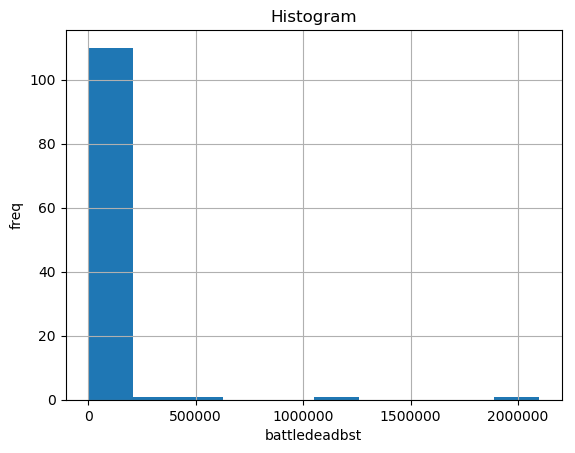

PyObject Text(0.5, 1.0, 'Histogram')

In [42]:
#ioff()
h = plt[:hist](df1[:battledeadbest],10) # Histogram, PyPlot.plt required to differentiate with conflicting hist command

grid("on")
xlabel("battledeadbst")
ylabel("freq")
title("Histogram")

#gcf() # Needed for IJulia to plot inline

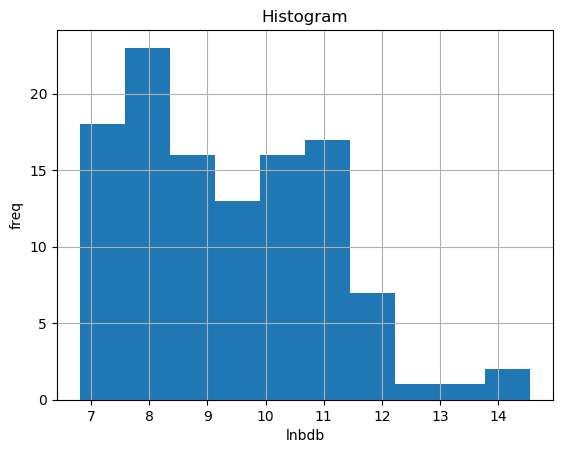

PyObject Text(0.5, 1.0, 'Histogram')

In [43]:
#ioff()
h = plt[:hist](df1[:lnbdb],10) # Histogram, PyPlot.plt required to differentiate with conflicting hist command

grid("on")
xlabel("lnbdb")
ylabel("freq")
title("Histogram")
#gcf()

# Linear Regression

## OLS estimation with StatsModels

In [21]:
m1 = fit(LinearModel, @formula(lnbdb ~ lnduration + lnpop + lnmilqual + lngdp + cw + lnmountain + democ + ethnicpolar + relpolar), df1)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: lnbdb ~ 1 + lnduration + lnpop + lnmilqual + lngdp + cw + lnmountain + democ + ethnicpolar + relpolar

Coefficients:
               Estimate Std.Error   t value Pr(>|t|)
(Intercept)     9.54259   1.97523   4.83113    <1e-5
lnduration     0.807215  0.119085   6.77849    <1e-8
lnpop        -0.0444459 0.0806522 -0.551082   0.5829
lnmilqual      0.100535  0.119599  0.840602   0.4027
lngdp         -0.190762  0.175242  -1.08857   0.2791
cw             0.666635  0.313273   2.12797   0.0359
lnmountain     0.101181  0.119736  0.845036   0.4002
democ         -0.870604  0.357806  -2.43317   0.0168
ethnicpolar   -0.980459  0.338806  -2.89386   0.0047
relpolar       0.118726  0.323089  0.367471   0.7141


In [22]:
m1

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: lnbdb ~ 1 + lnduration + lnpop + lnmilqual + lngdp + cw + lnmountain + democ + ethnicpolar + relpolar

Coefficients:
               Estimate Std.Error   t value Pr(>|t|)
(Intercept)     9.54259   1.97523   4.83113    <1e-5
lnduration     0.807215  0.119085   6.77849    <1e-8
lnpop        -0.0444459 0.0806522 -0.551082   0.5829
lnmilqual      0.100535  0.119599  0.840602   0.4027
lngdp         -0.190762  0.175242  -1.08857   0.2791
cw             0.666635  0.313273   2.12797   0.0359
lnmountain     0.101181  0.119736  0.845036   0.4002
democ         -0.870604  0.357806  -2.43317   0.0168
ethnicpolar   -0.980459  0.338806  -2.89386   0.0047
relpolar       0.118726  0.323089  0.367471   0.7141


In [23]:
# diagnostics

In [52]:
Pkg.add("StatPlots")
Pkg.add("Plots")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [53]:
using StatPlots, Plots

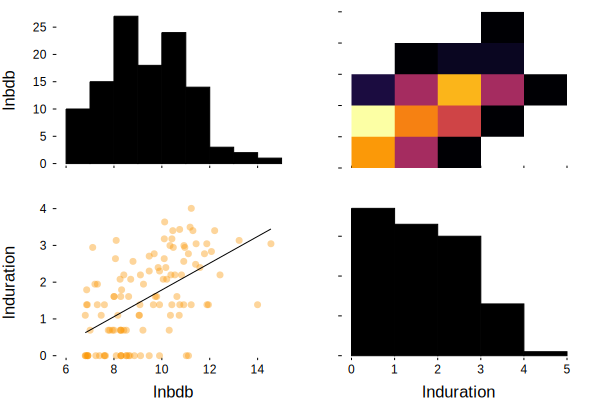

In [55]:
@df df2 corrplot([:lnbdb :lnduration], grid = false)